# 01. Importing Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 02. Importing Data

In [3]:
# Define path

path = r'C:\Users\carol\Documents\DA\02 Data Inmersion\06 Advanced Analytics & Dashboard Design\Olist Analysis'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'units_sold_max_items_1_min_units_3.csv'), index_col = False)

In [5]:
# Check dataset

df.head()

,Unnamed: 0,product_id,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price
0,6,001795ec6f1b187d37335e1c4704762e,9,1,53,274,3.222222,38.900000
1,8,001b72dfd63e9833e8c02742adf472e3,13,3,45,520,3.384615,34.990000
2,10,00210e41887c2a8ef9f791ebc780cc36,7,6,56,3893,4.000000,33.485000
3,11,002159fe700ed3521f46cfcf6e941c76,7,3,55,344,3.428571,202.700000
4,13,00250175f79f584c14ab5cecd80553cd,11,2,53,631,4.454545,75.444545


In [6]:
# Drop columns

df = df.drop(columns = ['Unnamed: 0'])

In [7]:
# Check output

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  8230 non-null   object 
 1   units_sold                  8230 non-null   int64  
 2   product_photos_qty          8230 non-null   int64  
 3   product_name_length         8230 non-null   int64  
 4   product_description_length  8230 non-null   int64  
 5   review_score                8230 non-null   float64
 6   item_price                  8230 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 450.2+ KB


# 03. Creating category subsets

## Adding category to the units sold table

In [8]:
# Check dimensions

df.shape

(8230, 7)

In [9]:
# Import olist_products_dataset

df_products = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'olist_products_dataset.csv'), index_col = False)

In [10]:
df_products = df_products[['product_id','product_category_name']]

In [11]:
# Merge items with products

df_merged = df.merge(df_products, on = 'product_id')

In [12]:
# Check the output

df_merged.head()

,product_id,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price,product_category_name
0,001795ec6f1b187d37335e1c4704762e,9,1,53,274,3.222222,38.900000,consoles_games
1,001b72dfd63e9833e8c02742adf472e3,13,3,45,520,3.384615,34.990000,moveis_decoracao
2,00210e41887c2a8ef9f791ebc780cc36,7,6,56,3893,4.000000,33.485000,beleza_saude
3,002159fe700ed3521f46cfcf6e941c76,7,3,55,344,3.428571,202.700000,fashion_calcados
4,00250175f79f584c14ab5cecd80553cd,11,2,53,631,4.454545,75.444545,utilidades_domesticas


In [13]:
# Import product_category_name_translation

df_category_en = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'product_category_name_translation.csv'), index_col = False)

In [14]:
# Merge merged dataset with category en

df_merged = df_merged.merge(df_category_en, on = 'product_category_name')

In [15]:
# Check the output

df_merged.head()

,product_id,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price,product_category_name,product_category_name_english
0,001795ec6f1b187d37335e1c4704762e,9,1,53,274,3.222222,38.900000,consoles_games,consoles_games
1,0129d1e9b29d3fe6833cc922374cd252,5,1,55,134,4.600000,13.216000,consoles_games,consoles_games
2,04dc26a02c448f6f2b914f01c2902ebd,11,1,50,361,4.333333,350.633333,consoles_games,consoles_games
3,06ead9c0b05b368667d858c09148af03,4,1,41,235,4.500000,108.650000,consoles_games,consoles_games
4,081088b5ca67de215fa103434690cedc,4,1,47,3947,5.000000,139.000000,consoles_games,consoles_games


In [16]:
# Drop columns from merged dataset

df_merged = df_merged.drop(columns = ['product_category_name'])

In [17]:
# Check the output

df_merged.shape

(8230, 8)

In [18]:
# Check output

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8230 entries, 0 to 8229
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     8230 non-null   object 
 1   units_sold                     8230 non-null   int64  
 2   product_photos_qty             8230 non-null   int64  
 3   product_name_length            8230 non-null   int64  
 4   product_description_length     8230 non-null   int64  
 5   review_score                   8230 non-null   float64
 6   item_price                     8230 non-null   float64
 7   product_category_name_english  8230 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 578.7+ KB


In [19]:
# Export dataset with new columns

df_merged.to_csv(os.path.join(path, '02 Data','Prepared Data', 'units_prod_sold_max_items_1_min_units_3.csv'))

## Choosing categories

In [20]:
# Agreggate units sold and average price by category

df_category = df_merged.groupby('product_category_name_english').agg({'product_id': ['nunique'],'units_sold': ['sum'], 'item_price': ['mean']})

In [21]:
# Check output

df_category.head(65)

,product_id,units_sold,item_price
,nunique,sum,mean
product_category_name_english,,,
agro_industry_and_commerce,15,136,311.743042
air_conditioning,31,175,171.410109
art,12,157,66.949111
arts_and_craftmanship,1,5,128.290000
audio,23,315,124.985289
...,...,...,...
perfumery,253,2497,134.731507
pet_shop,186,1179,105.037439


In [22]:
# Rename column

df_category.rename(columns = {'product_id' : 'product_count'}, inplace = True)

In [23]:
# Export new dataset

df_category.to_csv(os.path.join(path, '02 Data','Prepared Data', 'units_sold_by_category.csv'))

In [24]:
# Import data

df_category = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'units_sold_by_category.csv'), index_col = False)

In [25]:
# check dataset

df_category.head()

,Unnamed: 0,product_count,units_sold,item_price
0,NaN,nunique,sum,mean
1,product_category_name_english,NaN,NaN,NaN
2,agro_industry_and_commerce,15,136,311.74304211285795
3,air_conditioning,31,175,171.4101089664605
4,art,12,157,66.94911111111111


In [26]:
# Rename column

df_category.rename(columns = {'Unnamed: 0' : 'product_category'}, inplace = True)

In [27]:
# Drop rows

df_category = df_category.drop([0, 1])

In [28]:
# Check output

df_category.head()

,product_category,product_count,units_sold,item_price
2,agro_industry_and_commerce,15,136,311.74304211285795
3,air_conditioning,31,175,171.4101089664605
4,art,12,157,66.94911111111111
5,arts_and_craftmanship,1,5,128.29000000000002
6,audio,23,315,124.98528874264548


In [29]:
# Drop and reset index

df_category.reset_index(drop=True)

,product_category,product_count,units_sold,item_price
0,agro_industry_and_commerce,15,136,311.74304211285795
1,air_conditioning,31,175,171.4101089664605
2,art,12,157,66.94911111111111
3,arts_and_craftmanship,1,5,128.29000000000002
4,audio,23,315,124.98528874264548
...,...,...,...,...
66,stationery,213,1584,91.38565652624439
67,tablets_printing_image,5,73,74.43449973418394
68,telephony,376,3422,73.7670885946034
69,toys,316,2594,130.36485663731898


In [30]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 2 to 72
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_category  71 non-null     object
 1   product_count     71 non-null     object
 2   units_sold        71 non-null     object
 3   item_price        71 non-null     object
dtypes: object(4)
memory usage: 2.3+ KB


In [31]:
# Change types for data set

df_category['units_sold']=df_category['units_sold'].astype('int64')
df_category['item_price']=df_category['item_price'].astype('float64')
df_category['product_count']=df_category['product_count'].astype('float64')

In [32]:
# Export new dataset

df_category.to_csv(os.path.join(path, '02 Data','Prepared Data', 'units_sold_by_category_final.csv'))

In [33]:
top_10_units_sold = df_category.sort_values(by=['units_sold'], ascending=False)

In [34]:
top_10_avg_price = df_category.sort_values(by=['item_price'], ascending=False)

In [35]:
top_10_product_count = df_category.sort_values(by=['product_count'], ascending=False)

In [36]:
top_10_units_sold.head(10)

,product_category,product_count,units_sold,item_price
45,health_beauty,641.0,7034,138.057143
9,bed_bath_table,758.0,7000,90.116637
17,computers_accessories,526.0,5991,120.452823
67,sports_leisure,751.0,5720,120.442675
41,furniture_decor,620.0,5247,86.551350
51,housewares,594.0,4475,89.048517
72,watches_gifts,345.0,4434,206.098413
70,telephony,376.0,3422,73.767089
44,garden_tools,175.0,3355,156.847324
22,cool_stuff,255.0,2986,176.777313


In [37]:
top_10_avg_price.head(10)

,product_category,product_count,units_sold,item_price
16,computers,17.0,185,1027.244809
66,small_appliances_home_oven_and_coffee,6.0,42,706.725635
39,food_processors,2.0,6,520.260000
47,home_appliances_2,26.0,148,472.325807
2,agro_industry_and_commerce,15.0,136,311.743042
35,fixed_telephony,23.0,145,302.458393
65,small_appliances,73.0,467,298.168223
58,musical_instruments,64.0,383,274.740333
57,music,2.0,7,274.500000
72,watches_gifts,345.0,4434,206.098413


In [38]:
top_10_product_count.head(10)

,product_category,product_count,units_sold,item_price
9,bed_bath_table,758.0,7000,90.116637
67,sports_leisure,751.0,5720,120.442675
45,health_beauty,641.0,7034,138.057143
41,furniture_decor,620.0,5247,86.551350
51,housewares,594.0,4475,89.048517
17,computers_accessories,526.0,5991,120.452823
70,telephony,376.0,3422,73.767089
72,watches_gifts,345.0,4434,206.098413
7,auto,318.0,2178,121.703598
71,toys,316.0,2594,130.364857


#### I'll look at the relationship between variables for 2 categories:

#### - health_beauty: this is the category that has had the most sales
#### - watches_gifts: this is a category with a high price and volume of sales

## Creating category tables

### Health and Beauty

In [39]:
# Import data

df_sub = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'units_prod_sold_max_items_1_min_units_3.csv'), index_col = False)

In [40]:
# create a subset that only contains data from health and beauty

df_health_beauty =  df_sub[df_sub['product_category_name_english']== 'health_beauty']

In [41]:
# Export dataset

df_health_beauty.to_csv(os.path.join(path, '02 Data','Prepared Data', 'units_sold_health_beauty.csv'))

### Watches and gifts

In [42]:
# create a subset that only contains data from health and beauty

df_watches_gifts =  df_sub[df_sub['product_category_name_english']== 'watches_gifts']

In [43]:
# Export dataset

df_watches_gifts.to_csv(os.path.join(path, '02 Data','Prepared Data', 'units_sold_watches_gifts.csv'))

# 04. Explore relationships Part 4

## Health and Beauty

### Importing data

In [44]:
# Import data

df_corr_hab = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'units_sold_health_beauty.csv'), index_col = False)

In [45]:
# Check dataset

df_corr_hab.head()

,Unnamed: 0.1,Unnamed: 0,product_id,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price,product_category_name_english
0,710,710,00210e41887c2a8ef9f791ebc780cc36,7,6,56,3893,4.00,33.485,health_beauty
1,711,711,00878d953636afec00d3e85d55a12e7f,10,4,59,1631,4.20,100.000,health_beauty
2,712,712,0092a9e1c8a471753ed7ffa7eef5086e,3,1,48,1411,5.00,44.900,health_beauty
3,713,713,016711f78a6a87696645db0a6a834826,19,2,14,1366,4.55,100.135,health_beauty
4,714,714,02a97df83a8a100c7d2b14a02aea6a3d,5,1,46,378,3.00,69.900,health_beauty


In [46]:
# Drop columns

df_corr_hab = df_corr_hab.drop(columns = ['Unnamed: 0.1','Unnamed: 0','product_id','product_category_name_english'])

In [47]:
# Check output

df_corr_hab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   units_sold                  641 non-null    int64  
 1   product_photos_qty          641 non-null    int64  
 2   product_name_length         641 non-null    int64  
 3   product_description_length  641 non-null    int64  
 4   review_score                641 non-null    float64
 5   item_price                  641 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 30.2 KB


### Create a correlation heatmap using seaborn

In [48]:
# Create a correlation matrix using pandas

df_corr_hab.corr()

,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price
units_sold,1.000000,0.041543,0.064558,-0.024870,-0.004859,-0.027593
product_photos_qty,0.041543,1.000000,0.154334,0.271697,0.014941,0.120157
product_name_length,0.064558,0.154334,1.000000,0.210834,0.077863,0.061111
product_description_length,-0.024870,0.271697,0.210834,1.000000,-0.034532,0.129989
review_score,-0.004859,0.014941,0.077863,-0.034532,1.000000,0.051308
item_price,-0.027593,0.120157,0.061111,0.129989,0.051308,1.000000


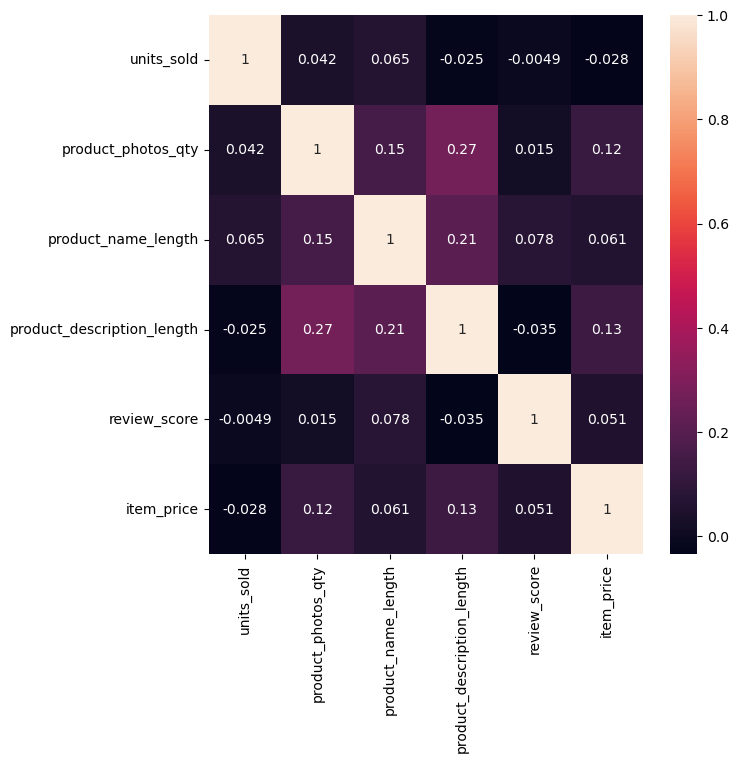

In [49]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(7,7))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_corr_hab.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Scatterplots

#### I'll create a scartterplot for number of pictures and description length

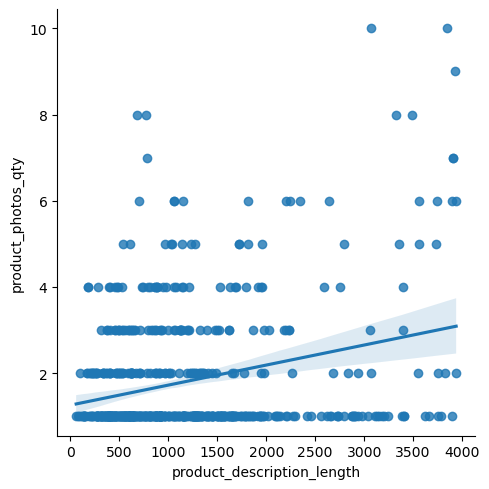

In [50]:
# Create a scatterplot for the "units sold" and "price per item" columns in seaborn

sns.lmplot(x = 'product_description_length', y = 'product_photos_qty', data = df_corr_hab)

#### The scarterplot shows that there's a linear weak relationship between the number of pictures and product description

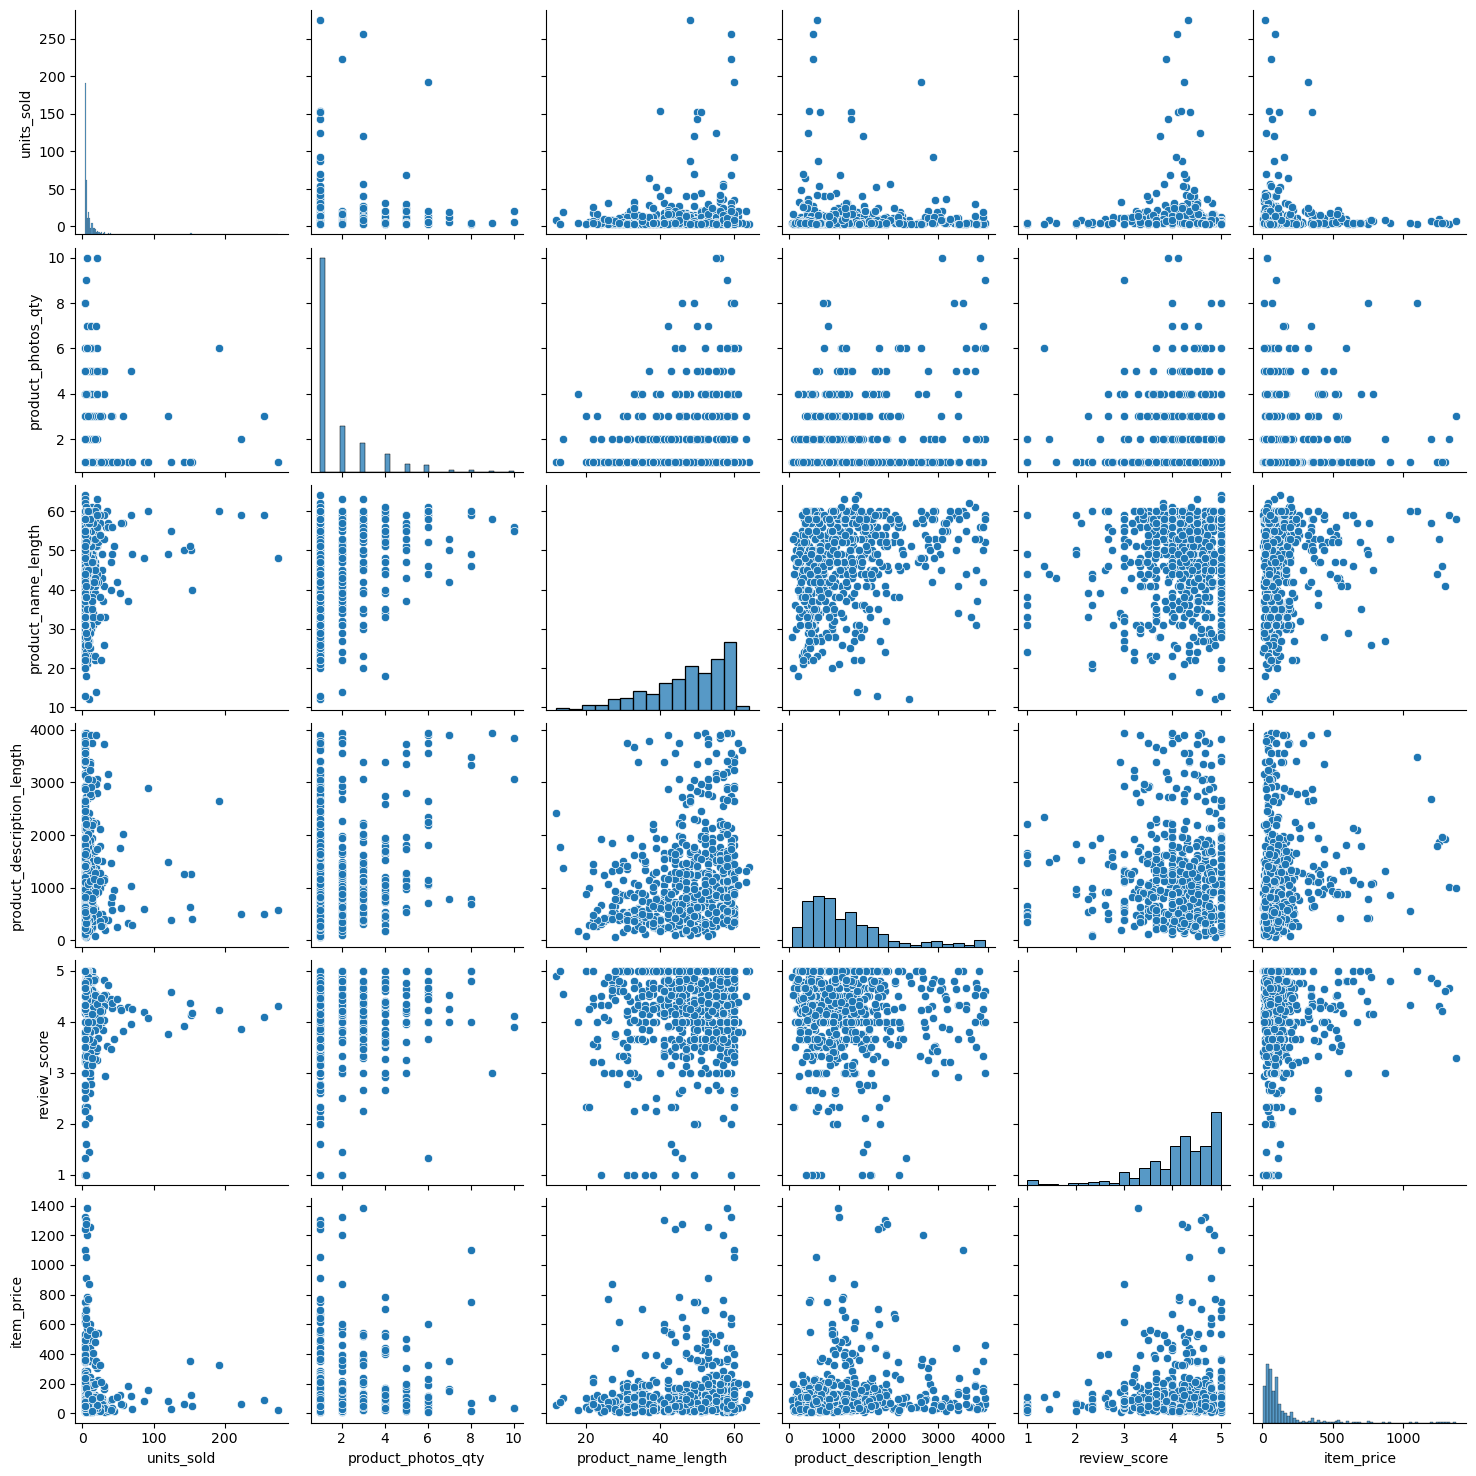

In [51]:
# Create a pair plot 

g = sns.pairplot(df_corr_hab)

## Watches and gifts

### Importing data

In [52]:
# Import data

df_corr_wag = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'units_sold_watches_gifts.csv'), index_col = False)

In [53]:
# Check dataset

df_corr_wag.head()

,Unnamed: 0.1,Unnamed: 0,product_id,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price,product_category_name_english
0,6534,6534,02475368dfb38934fe55f574024fe1d7,8,5,55,569,4.000000,29.000000,watches_gifts
1,6535,6535,025249b91a565601dc1b8f47ee7a230e,3,2,49,589,5.000000,239.000000,watches_gifts
2,6536,6536,02f8dd9b448d3ec2c73e65a22da1121c,7,1,43,597,3.428571,139.644286,watches_gifts
3,6537,6537,045c0f3faa3d81ff1af071e0811b2711,5,2,49,570,3.666667,192.401667,watches_gifts
4,6538,6538,045da764883d50dc071cc70c81226cbc,5,1,51,553,5.000000,263.385714,watches_gifts


In [54]:
# Drop columns

df_corr_wag = df_corr_wag.drop(columns = ['Unnamed: 0.1','Unnamed: 0','product_id','product_category_name_english'])

In [55]:
# Check output

df_corr_wag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   units_sold                  345 non-null    int64  
 1   product_photos_qty          345 non-null    int64  
 2   product_name_length         345 non-null    int64  
 3   product_description_length  345 non-null    int64  
 4   review_score                345 non-null    float64
 5   item_price                  345 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 16.3 KB


### Create a correlation heatmap using seaborn

In [56]:
# Create a correlation matrix using pandas

df_corr_wag.corr()

,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price
units_sold,1.000000,-0.005879,-0.165358,0.132089,-0.020737,-0.074453
product_photos_qty,-0.005879,1.000000,0.306392,-0.066520,-0.190311,-0.251419
product_name_length,-0.165358,0.306392,1.000000,-0.021441,-0.064948,-0.258496
product_description_length,0.132089,-0.066520,-0.021441,1.000000,0.082854,0.130928
review_score,-0.020737,-0.190311,-0.064948,0.082854,1.000000,0.042068
item_price,-0.074453,-0.251419,-0.258496,0.130928,0.042068,1.000000


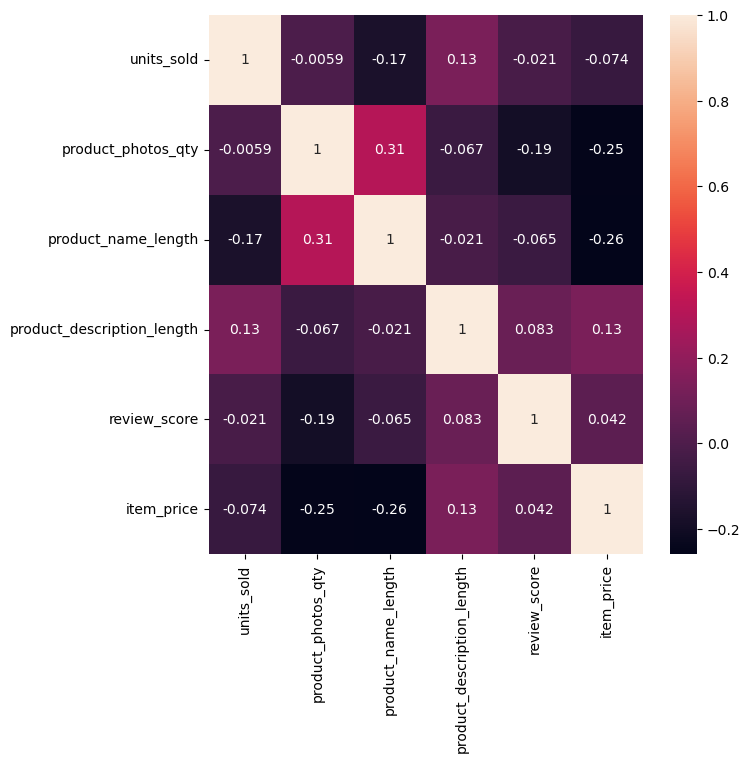

In [57]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(7,7))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_corr_wag.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Scatterplots

#### I'll create a scartterplot for number of pictures and description length

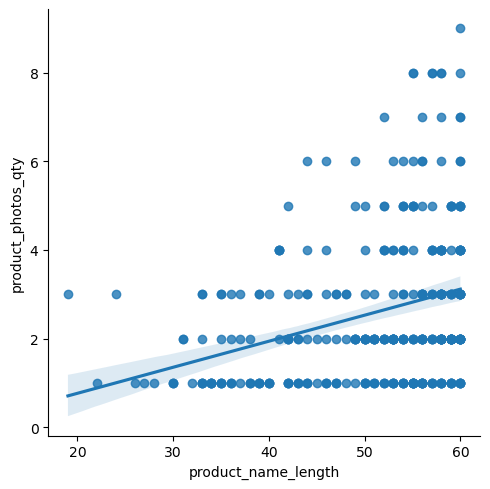

In [58]:
# Create a scatterplot for the "units sold" and "price per item" columns in seaborn

sns.lmplot(x = 'product_name_length', y = 'product_photos_qty', data = df_corr_wag)

#### The scarterplot shows that there's a linear weak relationship between the number of pictures and product description

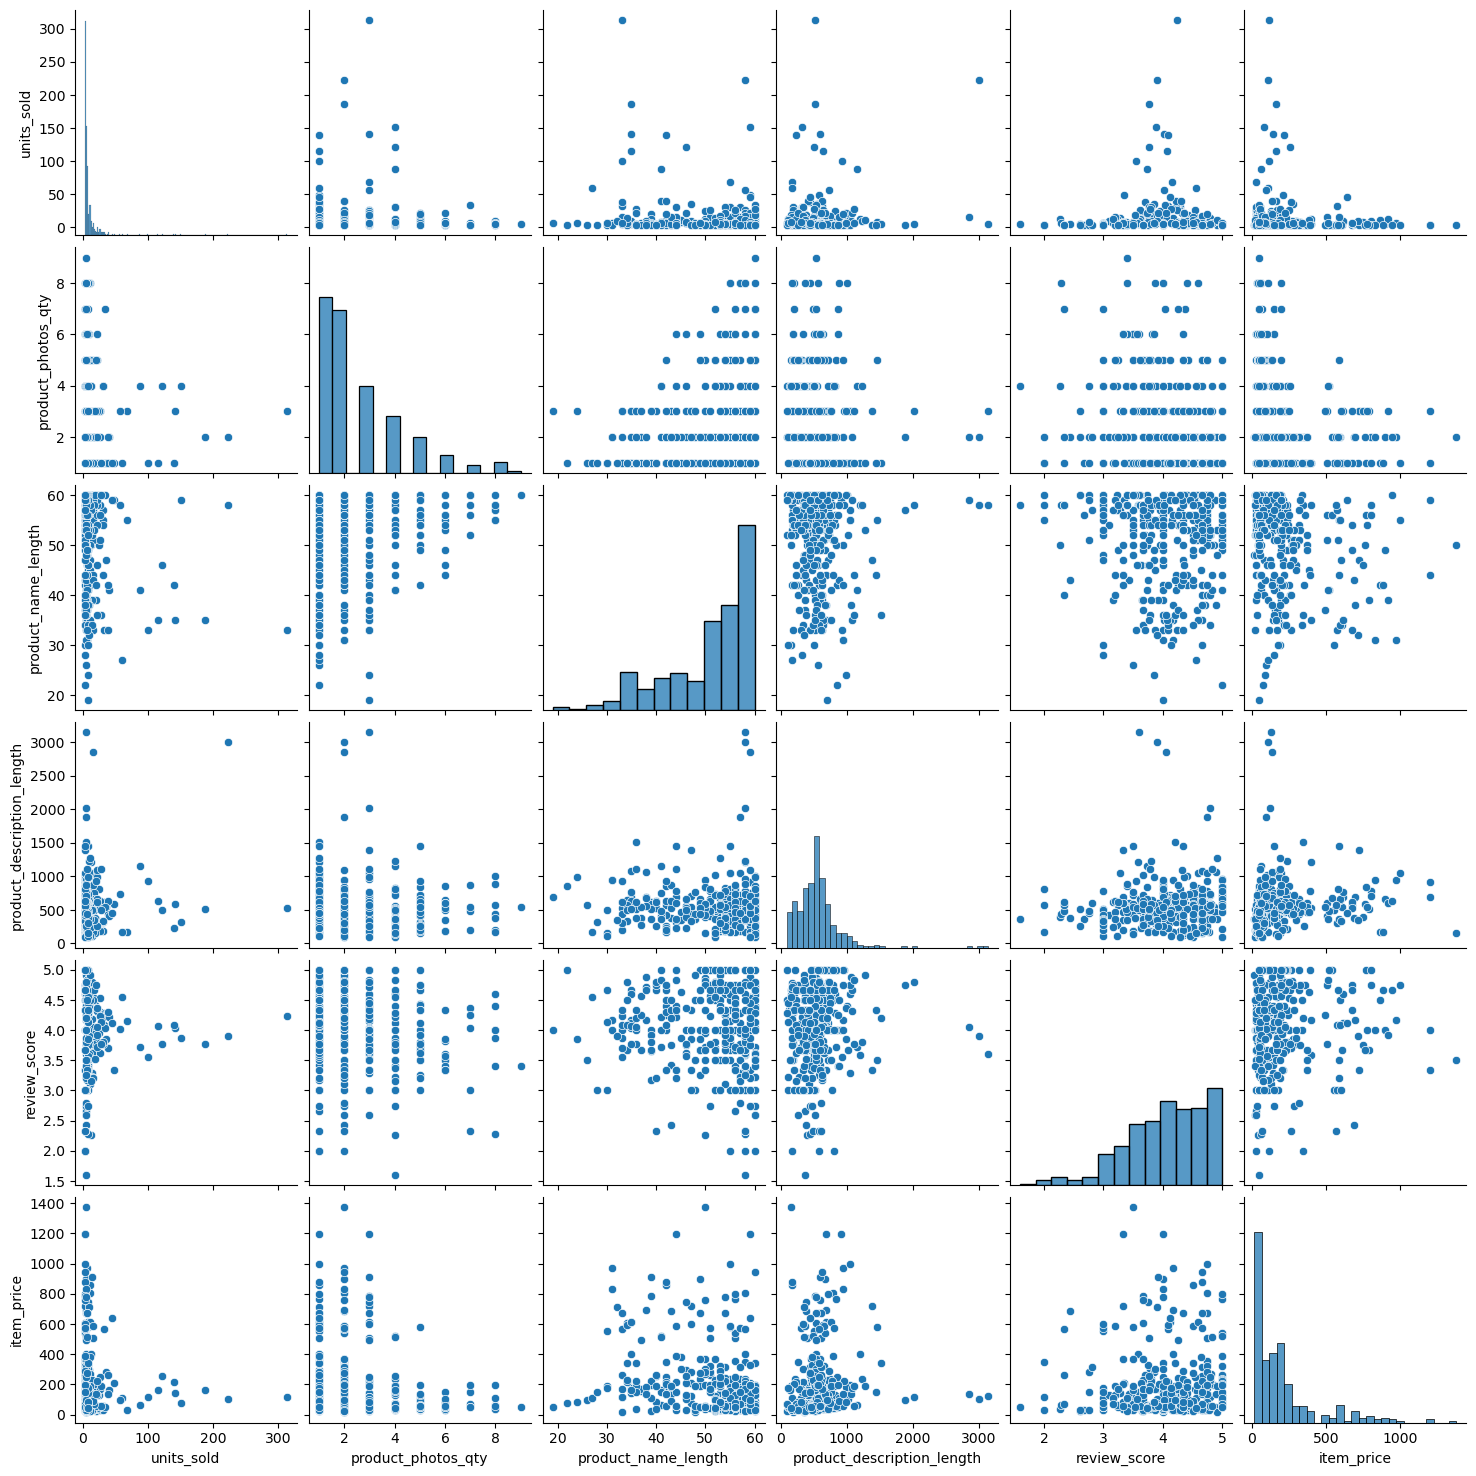

In [59]:
# Create a pair plot 

g = sns.pairplot(df_corr_wag)

# 05. Conclusions

#### When looking at data within specific categories, the results show no significant relationship between variables.

### Answering questions from task 6.1

#### •	Is there a relationship between the number of pictures published per product and sales?
####  The data doesn't show a significant relationship between these variables.

#### •	Is there a relationship between the length of the product description and units sold?
#### The data doesn't show a significant relationship between these variables.

# 06.Hypothesis

### Listings with 5 or more pictures would have a higher volume of sales

#### The dataset analyzed doesn't provide enough data to test this hypothesis. The below next steps won't be implemented because of data limitations
#### - Increase sample size
#### - Look into other variables